# Exploratory Data Analysis - Industrial Surface Defects

## Project Overview
This notebook performs an exploratory data analysis (EDA) on the NEU Surface Defect Dataset.  
The goal is to understand the dataset structure, identify potential issues, and prepare it for building an image classification model.

### Objectives:
1. Inspect the dataset and class distribution
2. Analyze image sizes and formats
3. Visualize sample images per defect class
4. Identify corrupted or problematic images
5. Draw conclusions to guide preprocessing and model training

## Import Libraries

In [19]:
import os
from pathlib import Path
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import random

## Load Dataset

In [20]:
# Path to the processed dataset
DATA_DIR = Path("../data/processed/train")  # adjust path if needed

# List all classes
classes = [d.name for d in DATA_DIR.iterdir() if d.is_dir()]
print("Classes found:", classes)

# Gather image paths for each class
image_paths = {cls: list((DATA_DIR/cls).glob("*.jpg")) for cls in classes}

# Count images per class
image_counts = {cls: len(imgs) for cls, imgs in image_paths.items()}
print("Number of images per class:", image_counts)


Classes found: ['pitted_surface', 'inclusion', 'patches', 'rolled-in_scale', 'scratches', 'crazing']
Number of images per class: {'pitted_surface': 209, 'inclusion': 209, 'patches': 209, 'rolled-in_scale': 209, 'scratches': 209, 'crazing': 209}


## Visualize Class Distribution

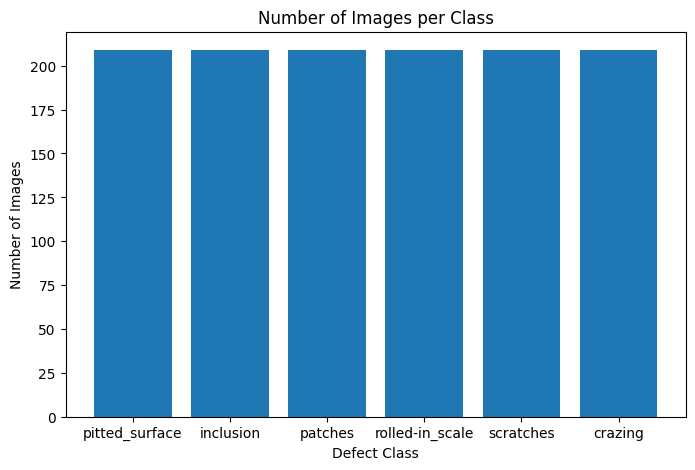

In [21]:
plt.figure(figsize=(8,5))
plt.bar(image_counts.keys(), image_counts.values())
plt.title("Number of Images per Class")
plt.ylabel("Number of Images")
plt.xlabel("Defect Class")
plt.show()

## Analyze Image Sizes and Formats

Image formats: Counter({'JPEG': 1254})
Image width range: 200 - 200
Image height range: 200 - 200


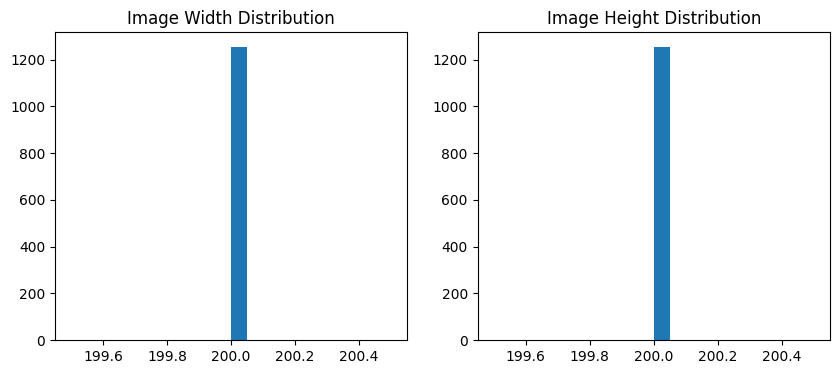

In [22]:
widths, heights = [], []
formats = Counter()

for cls, imgs in image_paths.items():
    for img_path in imgs:
        with Image.open(img_path) as img:
            widths.append(img.width)
            heights.append(img.height)
            formats[img.format] += 1

print("Image formats:", formats)
print("Image width range:", min(widths), "-", max(widths))
print("Image height range:", min(heights), "-", max(heights))

# Histograms
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(widths, bins=20)
plt.title("Image Width Distribution")

plt.subplot(1,2,2)
plt.hist(heights, bins=20)
plt.title("Image Height Distribution")
plt.show()

## Visualize Sample Images per Class

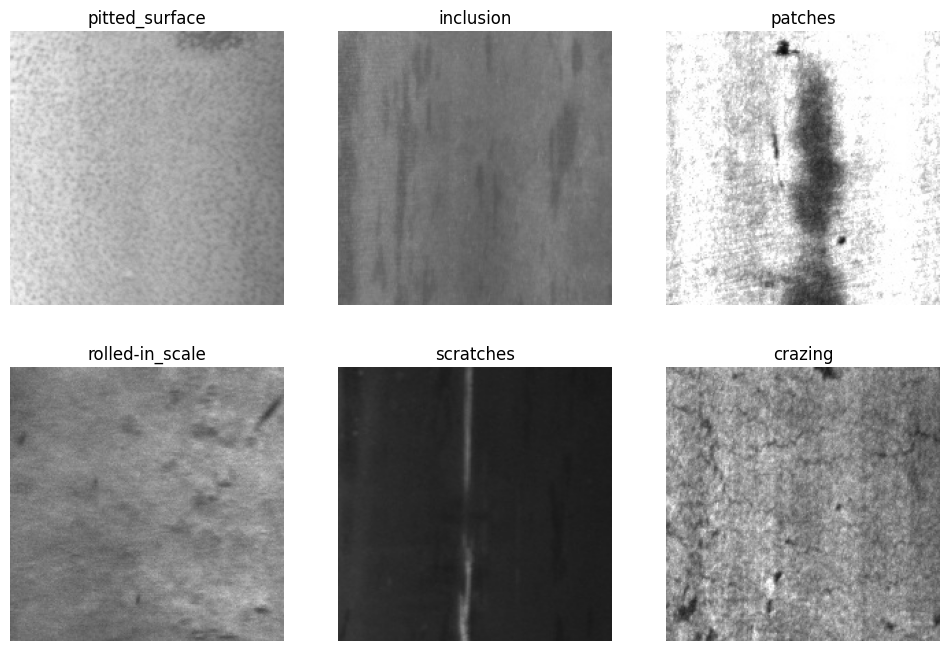

In [23]:
plt.figure(figsize=(12,8))
for i, cls in enumerate(classes):
    img_path = random.choice(image_paths[cls])
    img = Image.open(img_path)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

## Check for Corrupted Images

In [24]:
corrupt_images = []

for cls, imgs in image_paths.items():
    for img_path in imgs:
        try:
            with Image.open(img_path) as img:
                img.verify()  # check if the image is corrupted
        except:
            corrupt_images.append(img_path)

print("Number of corrupted images found:", len(corrupt_images))

Number of corrupted images found: 0


## Summary / Conclusions

### EDA Summary

- Dataset contains 6 classes of steel surface defects.
- Class distribution shows that the dataset is balanced.
- Image sizes are uniform, all 200x200.
- Number of corrupted images: 0.
- Dataset is now ready for preprocessing, data augmentation, and training a robust image classification model.